xgboost classification

random forest

desicion trees 



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
# Load Iris Dataset
data = load_iris()
X = data.data[:, :2]  # Use first 2 features for visualization
y = data.target

In [3]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
### **1. XGBoost Classifier**
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

xgb_params = {
    'objective': 'multi:softmax',
    'num_class': 3,
    'learning_rate': 0.1,
    'max_depth': 4
}

xgb_model = xgb.train(xgb_params, dtrain, num_boost_round=100)
xgb_pred = xgb_model.predict(dtest)
xgb_accuracy = accuracy_score(y_test, xgb_pred)
print(f"XGBoost Accuracy: {xgb_accuracy:.2f}")

XGBoost Accuracy: 0.77


In [7]:
### **2. Random Forest Classifier**
rf_model = RandomForestClassifier(n_estimators=100, max_depth=4, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")

Random Forest Accuracy: 0.87


In [8]:
### **3. Decision Tree Classifier**
dt_model = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)
print(f"Decision Tree Accuracy: {dt_accuracy:.2f}")

Decision Tree Accuracy: 0.83


In [12]:
### **Visualization Function**
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    
    if isinstance(model, xgb.Booster):
        dmatrix = xgb.DMatrix(np.c_[xx.ravel(), yy.ravel()])
        Z = model.predict(dmatrix)
    else:
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o')
    plt.title(title)
    plt.show()
    

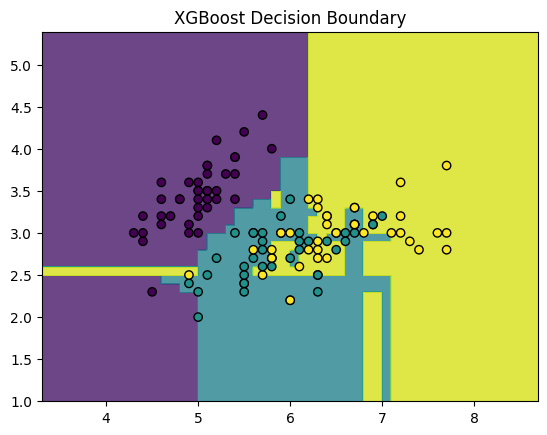

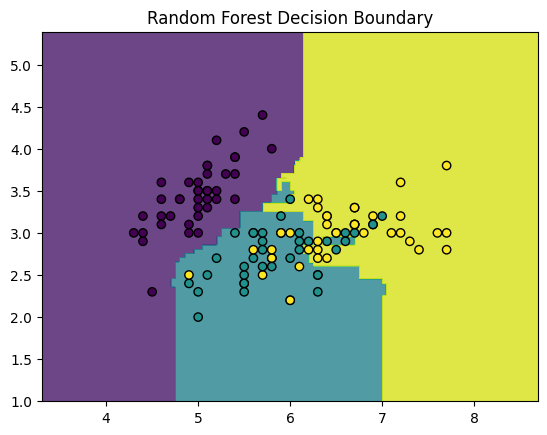

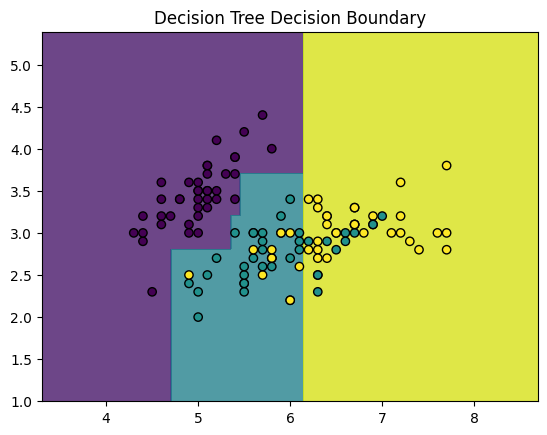

In [10]:
### **Plot All Decision Boundaries**
plot_decision_boundary(xgb_model, X_train, y_train, "XGBoost Decision Boundary")
plot_decision_boundary(rf_model, X_train, y_train, "Random Forest Decision Boundary")
plot_decision_boundary(dt_model, X_train, y_train, "Decision Tree Decision Boundary")
